In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for model training
from sklearn.model_selection import train_test_split

#for confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

#for decision tree
from sklearn.tree import DecisionTreeClassifier

# for KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

#for Randomforest
from sklearn.ensemble import RandomForestRegressor



In [55]:
data = pd.read_csv('water_potability.csv')
#data
data.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


# EDA

In [56]:
data.shape #rows and columns

(3276, 10)

# DATA CLEANING

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [58]:
#TO FIND THE MISSING OR NULL VALUES
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [59]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [60]:
#DATA CLEANING OR FILLING THE NULL VALUE
data.fillna(data.mean(),inplace=True)
data.head(2) 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0


In [61]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

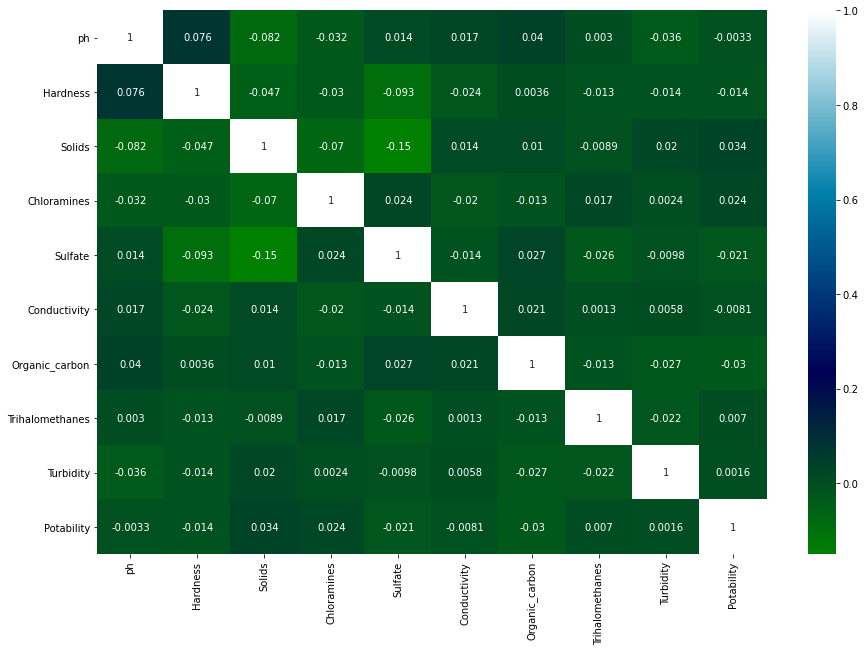

In [62]:
#TO CHECK THE CORRELATION BETWEEN THE COLUMNS
sns.heatmap(data.corr(),annot=True,cmap='ocean')
fig=plt.gcf()
fig.set_size_inches(15,10)

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690300
50%      20927.833605
75%      27332.762125
max      61227.196010
Name: Solids, dtype: float64


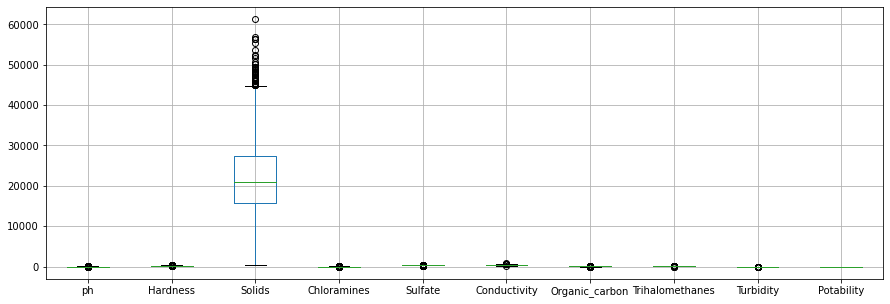

In [63]:
# TO CHECK THE OUTLIERS
data.boxplot(figsize=(15,5))
print(data['Solids'].describe())

NOT REMOVING THE OUTLIERS BCOZ IT IS IMPORTANT TO DECIDE THE WATER SAMPLE

In [64]:
data.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0


In [65]:
data.nunique()

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

In [66]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

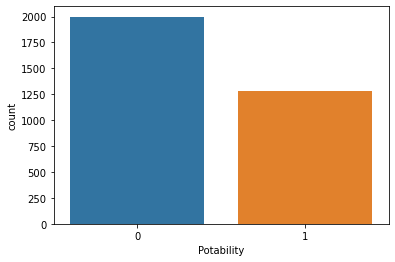

In [67]:
sns.countplot(data['Potability'])

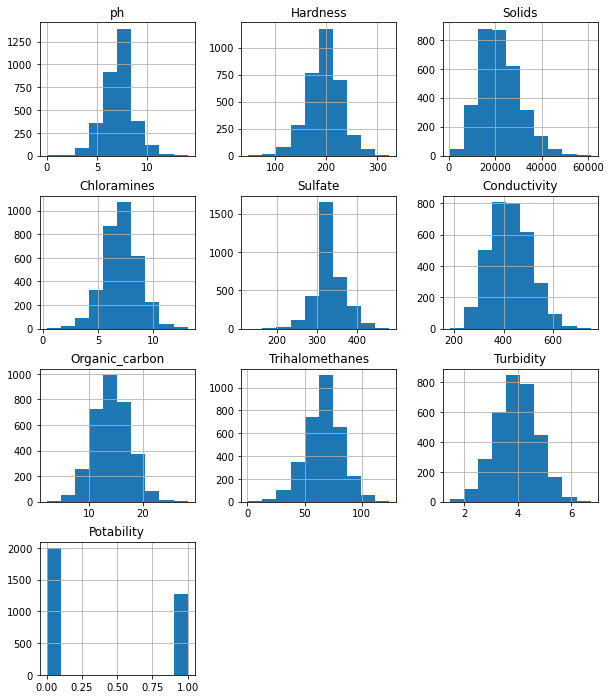

In [68]:
data.hist(figsize=(10,12))
plt.show()

In [69]:
#sns.barplot(x=data['ph'],y=data['Hardness'],hue=data['Potability'])
#plt.show()

In [70]:
#sns.scatterplot(x=data['Potability'],y=data['ph'])
#plt.show()

# MODEL TRAINING

Splitting the data for training and test

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = data.drop('Potability',axis=1)
Y = data['Potability']

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3)

In [74]:
print(X_train.head())
print("XXXXXXXXX")
print(Y_train.head())

            ph    Hardness       Solids  Chloramines     Sulfate  \
2803  7.017295  170.132446  20169.34425     5.216280  378.226971   
2095  6.047381  230.586285  20278.38298     9.360799  305.776583   
1578  6.865569  231.445054  22585.78881     5.676387  333.775777   
2240  6.323040  227.553972  24463.13742     6.261934  333.775777   
1994  7.664794  223.578474  20259.72585     7.385414  351.161331   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2803    512.768439       15.505992        64.624944   4.899611  
2095    333.530768       12.593848        55.301836   2.216730  
1578    496.603425       16.154964        91.461709   4.916218  
2240    399.947453       17.912652        71.151222   4.749424  
1994    510.046897       14.205221        73.192470   5.481691  
XXXXXXXXX
2803    1
2095    0
1578    1
2240    0
1994    1
Name: Potability, dtype: int64


In [75]:
print(X_test.head())
print("XXXXXXXXX")
print(Y_test.head())

            ph    Hardness       Solids  Chloramines     Sulfate  \
2112  3.715171  199.083393  15900.79715     8.561198  291.104167   
1723  6.115638  240.975156  15765.78672    10.088345  339.402440   
80    1.844538  233.764343  28689.59578     7.724432  333.775777   
1586  8.242559  155.616112  24042.18816     7.639210  338.293868   
1811  7.080795  247.164018  18939.61646     7.086375  305.040026   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2112    371.847136       11.973577        66.396293   2.353338  
1723    407.319539       21.305048        63.071597   3.723625  
80      410.387264       15.611859        54.299444   5.013463  
1586    418.263757       13.265853        66.577952   3.529427  
1811    419.453088       12.758114        60.319203   4.287441  
XXXXXXXXX
2112    0
1723    0
80      0
1586    1
1811    0
Name: Potability, dtype: int64


# DECISION TREE

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [77]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [78]:
Y_test.head(10)

2112    0
1723    0
80      0
1586    1
1811    0
3192    1
1973    1
3208    1
2068    0
18      0
Name: Potability, dtype: int64

In [79]:
Y_prediction = dt.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
Desicion_Tree = accuracy_score(Y_prediction,Y_test)*100
Desicion_Tree

60.52899287894201

In [82]:
confusion_matrix(Y_prediction,Y_test) 

# TP , FP
# FN,  TN  F-FALSE, T- TRUE, P- POSITIVE , N-NEGATIVE

array([[421, 186],
       [202, 174]])

In [83]:
Y_test.shape

(983,)

# KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [86]:
knn = KNeighborsClassifier()

In [87]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [88]:
Y_test.head()

2112    0
1723    0
80      0
1586    1
1811    0
Name: Potability, dtype: int64

In [89]:
Y_prediction = knn.predict(X_test)

In [90]:
KnowNN = accuracy_score(Y_prediction,Y_test)*100
KnowNN

58.90132248219736

In [91]:
confusion_matrix(Y_prediction,Y_test) 

array([[457, 238],
       [166, 122]])

In [92]:
Y_test.shape

(983,)

1.from sklearn.neighbors import KNeighborsClassifier

2.knn = KNeighborsClassifier()
3.knn.fit(X_train,Y_train)

4.Y_test.head()

5.Y_prediction = knn.predict(X_test)

6.KnowNN = accuracy_score(Y_prediction,Y_test)*100
7.KnowNN

8.confusion_matrix(Y_prediction,Y_test) 

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
#rf = RandomForestRegressor()
#rf.fit(X_train,Y_train)

#print(Y_test.head())

In [95]:
#Y_prediction = rf.predict(X_test)

In [96]:
#accuracy_score(Y1_prediction,Y_test)*100

In [97]:
#confusion_matrix(Y_prediction,Y_test)

# MODEL OPTIMIZATION / HYPER PARAMETER TUNNING

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [99]:
dt = DecisionTreeClassifier()


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Potability',axis=1)
Y = data['Potability']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

Y_prediction = dt.predict(X_test)
Desicion_Tree = accuracy_score(Y_prediction,Y_test)*100

confusion_matrix(Y_prediction,Y_test) 
